In [1]:
import warnings

warnings.filterwarnings('ignore')

# Dataset and Knowledge settings

In [2]:
import pandas as pd

df = pd.read_csv('./resources/wine_quality/data.csv')
df['quality'] = df['quality'].astype(float)
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.9911,3.27,0.50,11.2,6.0,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.9949,3.15,0.46,9.6,5.0,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.9925,2.99,0.46,9.4,6.0,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.9887,3.34,0.38,12.8,7.0,white


In [3]:
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   float64
 12  type                  6497 non-null   object 
dtypes: float64(12), object(1)
memory usage: 660.0+ KB


None

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987100,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992300,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994900,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.039000,4.010000,2.000000,14.900000,9.000000


In [4]:
from causal_nest.knowledge import parse_knowledge_file

knowledge = parse_knowledge_file('./resources/wine_quality/knowledge.txt')
knowledge

Knowledge(required_edges=[('alcohol', 'quality'), ('total_sulfur_dioxide', 'quality')], forbidden_edges=[('quality', 'free_sulfur_dioxide'), ('quality', 'residual_sugar'), ('quality', 'volatile_acidity'), ('quality', 'sulphates'), ('quality', 'citric_acid'), ('quality', 'chlorides'), ('quality', 'pH'), ('quality', 'fixed_acidity'), ('quality', 'density'), ('quality', 'alcohol'), ('quality', 'total_sulfur_dioxide')])

In [5]:
from causal_nest.dataset import MissingDataHandlingMethod, Dataset, handle_missing_data, FeatureTypeMap, FeatureType, estimate_feature_importances

feature_mapping = [FeatureTypeMap(feature=c, type=FeatureType.CONTINUOUS) for c in df.drop(['type', 'quality'], axis=1).columns]

dataset = Dataset(data=df, target='quality', feature_mapping=feature_mapping)
dataset = handle_missing_data(dataset, MissingDataHandlingMethod.FORWARD_FILL)
dataset = estimate_feature_importances(dataset)
dataset

Dataset(data=      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free_sul

In [6]:
from causal_nest.problem import Problem

problem = Problem(dataset=dataset, description='Wine Quality', knowledge=knowledge)
problem

Problem(dataset=Dataset(data=      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

## Checking the Feature infered importance

In [7]:
problem.dataset.feature_mapping

[FeatureTypeMap(feature='alcohol', type=<FeatureType.CONTINUOUS: 3>, importance=0.2517629091178628),
 FeatureTypeMap(feature='volatile_acidity', type=<FeatureType.CONTINUOUS: 3>, importance=0.12942923805932646),
 FeatureTypeMap(feature='free_sulfur_dioxide', type=<FeatureType.CONTINUOUS: 3>, importance=0.09013572640518787),
 FeatureTypeMap(feature='sulphates', type=<FeatureType.CONTINUOUS: 3>, importance=0.07973659468487942),
 FeatureTypeMap(feature='total_sulfur_dioxide', type=<FeatureType.CONTINUOUS: 3>, importance=0.07499428930146503),
 FeatureTypeMap(feature='residual_sugar', type=<FeatureType.CONTINUOUS: 3>, importance=0.07204889776682073),
 FeatureTypeMap(feature='pH', type=<FeatureType.CONTINUOUS: 3>, importance=0.06668376269732064),
 FeatureTypeMap(feature='chlorides', type=<FeatureType.CONTINUOUS: 3>, importance=0.06572873915434481),
 FeatureTypeMap(feature='citric_acid', type=<FeatureType.CONTINUOUS: 3>, importance=0.058558257624799916),
 FeatureTypeMap(feature='fixed_acidity

# Causal Discovery

In [60]:
# from dodiscover import make_context
# from dodiscover.toporder.score import SCORE

ModuleNotFoundError: No module named 'dodiscover'

In [25]:
from causallearn.search.PermutationBased.GRaSP import grasp
from causal_nest.dataset import featured_only_data
import networkx as nx

fod = featured_only_data(dataset)
g = grasp(fod.to_numpy())
# nx.from_edgelist(g)
# # dir(g[0])
# str(g[0])
g

GRaSP edge count: 42    
GRaSP completed in: 1.05s 


In [30]:
dir(g)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 'add_ambiguous_triple',
 'add_attribute',
 'add_bidirected_edge',
 'add_directed_edge',
 'add_dotted_underline_triple',
 'add_edge',
 'add_node',
 'add_nondirected_edge',
 'add_partially_oriented_edge',
 'add_underline_triple',
 'add_undirected_edge',
 'adjust_dpath',
 'ambiguous_triples',
 'attributes',
 'clear',
 'collect_ancestors',
 'contains_edge',
 'contains_node',
 'def_non_descendent',
 'def_visible',
 'dotted_underline_triples',
 'dpath',
 'exists_directed_cycle',
 'exists_directed_path_from_to',
 'exists_inducing_path',
 'exists_semidirected_path_from_to',
 'ex

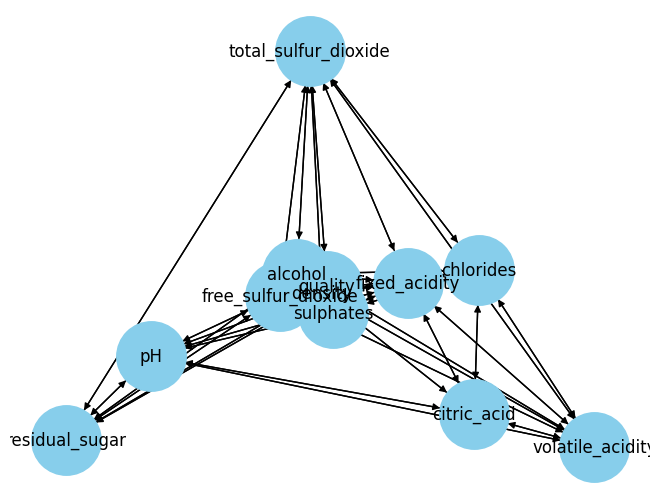

In [43]:
x = nx.from_numpy_array(g.graph, create_using=nx.DiGraph)
mapping = {i: fod.columns[i] for i in range(len(fod.columns))}
x = nx.relabel_nodes(x, mapping)
nx.draw(x, with_labels=True, node_color='skyblue', node_size=2500)

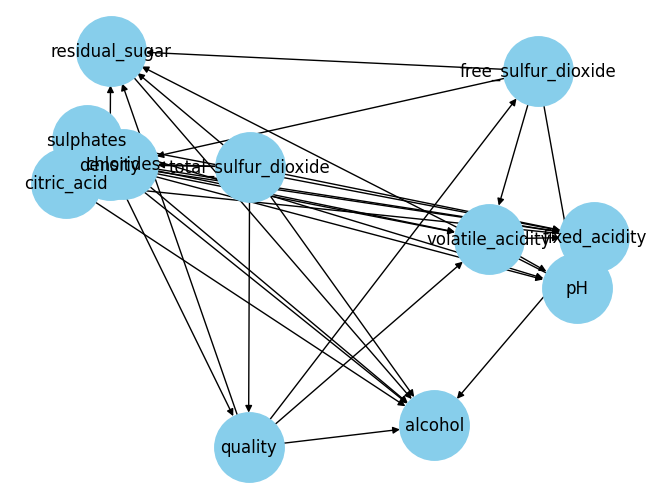

In [46]:
from causal_nest.utils import dagify_graph
x = dagify_graph(x)
nx.draw(x, with_labels=True, node_color='skyblue', node_size=2500)

In [22]:
from causal_nest.discovery import applyable_models

models = applyable_models(problem)
models

[causal_nest.discovery_models.ccdr.CCDR,
 causal_nest.discovery_models.cgnn.CGNN,
 causal_nest.discovery_models.fast_iamb.FAST_IAMB,
 causal_nest.discovery_models.gs.GS,
 causal_nest.discovery_models.iamb.IAMB,
 causal_nest.discovery_models.inter_iamb.INTER_IAMB,
 causal_nest.discovery_models.pc.PC,
 causal_nest.discovery_models.sam.SAM]

  0%|          | 0/4000 [00:08<?, ?it/s, disc=0.315, gen=-.429, regul_loss=0.192, tot=-4.96]


~Stats for CCDR~

		Runtime: 9.783595 seconds
		AUC_PR: None
		SHD: None
		SID: None
		Priority Score: 0.4311893639956881
		Integrity Score: 0.5
		Forbidden Edges Violation Rate: 0.0
		Required Edges Compliance Rate: 0.5




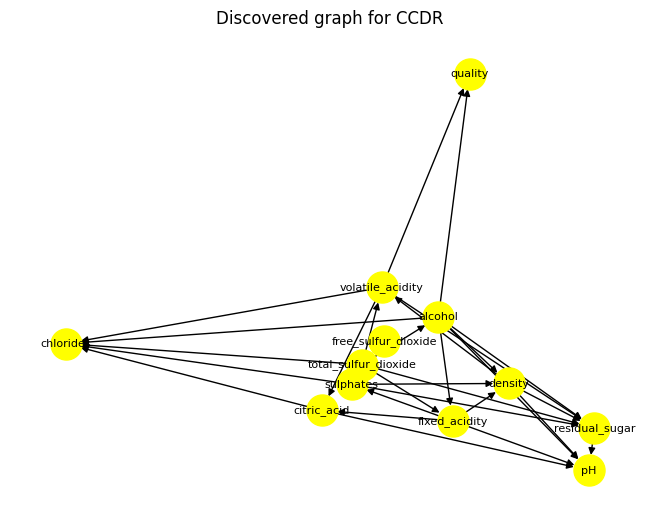

  0%|          | 2/4000 [00:20<11:06:51, 10.01s/it, disc=0.315, gen=-.429, regul_loss=0.192, tot=-4.96]


~Stats for PC~

		Runtime: 22.491373 seconds
		AUC_PR: None
		SHD: None
		SID: None
		Priority Score: 0.0
		Integrity Score: 0.0
		Forbidden Edges Violation Rate: 0.18181818181818182
		Required Edges Compliance Rate: 0.0




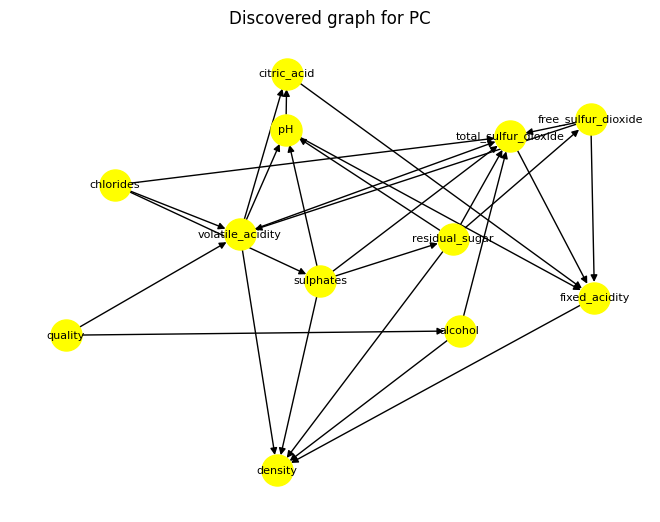

  0%|          | 16/4000 [01:43<6:13:26,  5.62s/it, disc=0.315, gen=-.429, regul_loss=0.192, tot=-4.96]


~Stats for GS~

		Runtime: 105.767815 seconds
		AUC_PR: None
		SHD: None
		SID: None
		Priority Score: 0.3784052647689011
		Integrity Score: 0.0
		Forbidden Edges Violation Rate: 0.18181818181818182
		Required Edges Compliance Rate: 0.0




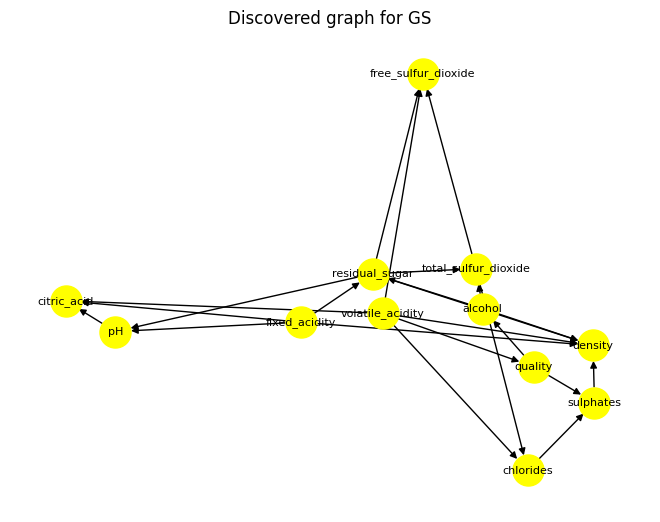


~Stats for FAST_IAMB~

		Runtime: 109.238689 seconds
		AUC_PR: None
		SHD: None
		SID: None
		Priority Score: 0.24104683195592286
		Integrity Score: 0.0
		Forbidden Edges Violation Rate: 0.09090909090909091
		Required Edges Compliance Rate: 0.0




  0%|          | 17/4000 [01:49<6:11:14,  5.59s/it, disc=0.315, gen=-.429, regul_loss=0.192, tot=-4.96]


~Stats for INTER_IAMB~

		Runtime: 109.822157 seconds
		AUC_PR: None
		SHD: None
		SID: None
		Priority Score: 0.24104683195592286
		Integrity Score: 0.0

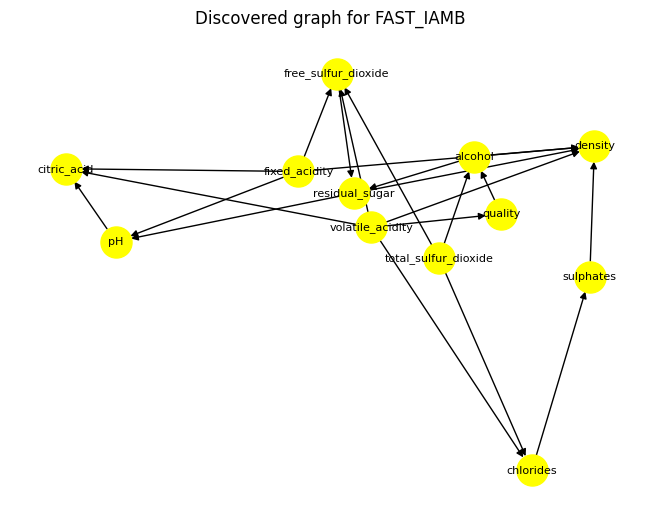


		Forbidden Edges Violation Rate: 0.09090909090909091
		Required Edges Compliance Rate: 0.0



~Stats for IAMB~

		Runtime: 110.334691 seconds
		AUC_PR: None
		SHD: None
		SID: None
		Priority Score: 0.24104683195592286
		Integrity Score: 0.0
		Forbidden Edges Violation Rate: 0.09090909090909091

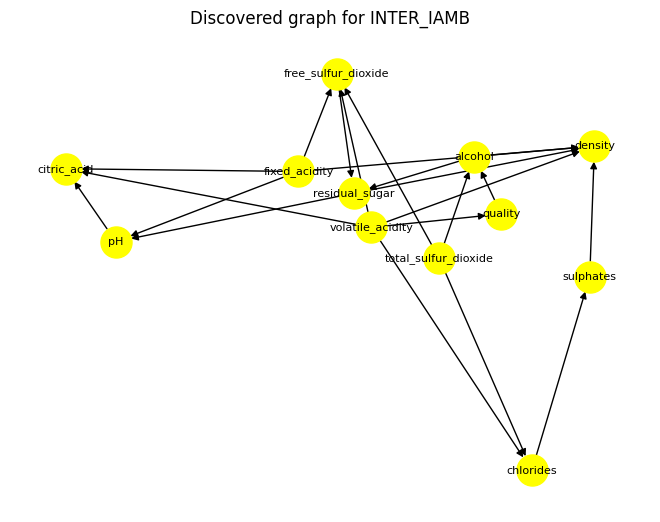


		Required Edges Compliance Rate: 0.0




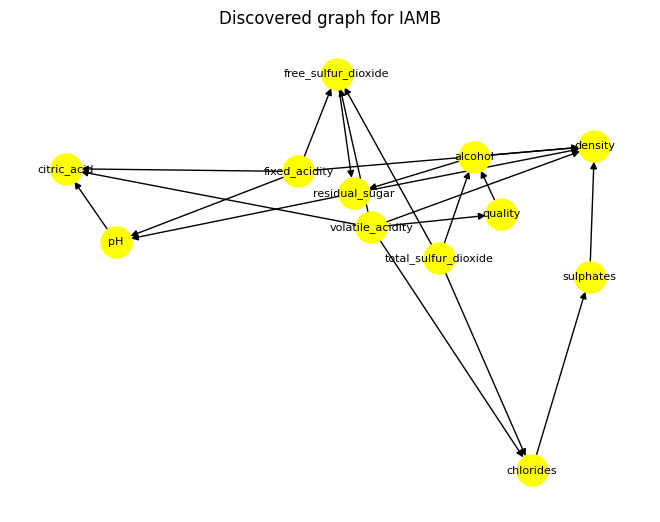

  2%|▏         | 95/4000 [07:58<5:10:10,  4.77s/it, disc=0.00101, gen=-.996, regul_loss=0.192, tot=-11.8] 

Abnormal termination. Exit code: -9


 75%|███████▍  | 2994/4000 [3:23:32<1:08:53,  4.11s/it, disc=1.88e+10, gen=-1.88e+10, regul_loss=0.0693, tot=-2.26e+11]

{'CCDR': DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fff1380f5b0>, model='CCDR', auc_pr=None, shd=None, sid=None, runtime=9.783595323038753, priority_score=0.4311893639956881, knowledge_integrity_score=0.5, forbidden_edges_violation_rate=0.0, required_edges_compliance_rate=0.5),
 'CGNN': None,
 'FAST_IAMB': DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fff13a14fd0>, model='FAST_IAMB', auc_pr=None, shd=None, sid=None, runtime=109.23868932301411, priority_score=0.24104683195592286, knowledge_integrity_score=0.0, forbidden_edges_violation_rate=0.09090909090909091, required_edges_compliance_rate=0.0),
 'GS': DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fff138786d0>, model='GS', auc_pr=None, shd=None, sid=None, runtime=105.76781457901234, priority_score=0.3784052647689011, knowledge_integrity_score=0.0, forbidden_edges_violation_rate=0.18181818181818182, required_edges_compliance_rate=0.0),
 'IAMB':

In [23]:
from causal_nest.discovery import discover_with_all_models

problem = discover_with_all_models(problem, verbose=True, max_seconds_model=28800)
problem.discovery_results

In [24]:
list(sorted(filter(lambda x: x, problem.discovery_results.values()), key=lambda x: x.priority_score, reverse=True))

[DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fff1380f5b0>, model='CCDR', auc_pr=None, shd=None, sid=None, runtime=9.783595323038753, priority_score=0.4311893639956881, knowledge_integrity_score=0.5, forbidden_edges_violation_rate=0.0, required_edges_compliance_rate=0.5),
 DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fff138786d0>, model='GS', auc_pr=None, shd=None, sid=None, runtime=105.76781457901234, priority_score=0.3784052647689011, knowledge_integrity_score=0.0, forbidden_edges_violation_rate=0.18181818181818182, required_edges_compliance_rate=0.0),
 DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fff13a14fd0>, model='FAST_IAMB', auc_pr=None, shd=None, sid=None, runtime=109.23868932301411, priority_score=0.24104683195592286, knowledge_integrity_score=0.0, forbidden_edges_violation_rate=0.09090909090909091, required_edges_compliance_rate=0.0),
 DiscoveryResult(output_graph=<networkx.classes.di

# Causal Estimation

In [25]:
from causal_nest.estimation import estimate_all_effects

problem = estimate_all_effects(problem, verbose=True)
problem.estimation_results

{'CCDR': None,
 'GS': None,
 'FAST_IAMB': None,
 'IAMB': None,
 'INTER_IAMB': None,
 'PC': [EstimationResult(model='PC', treatment='alcohol', estimand=<dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7fff138f7880>, estimate=<dowhy.causal_estimator.CausalEstimate object at 0x7fff13a22610>, control_value=0, treatment_value=1, p_value=None),
  EstimationResult(model='PC', treatment='volatile_acidity', estimand=<dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7fff13a22c70>, estimate=<dowhy.causal_estimator.CausalEstimate object at 0x7fff13a22040>, control_value=0, treatment_value=1, p_value=None),
  EstimationResult(model='PC', treatment='free_sulfur_dioxide', estimand=<dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7fff13a22070>, estimate=<dowhy.causal_estimator.CausalEstimate object at 0x7fff13a22310>, control_value=0, treatment_value=1, p_value=None),
  EstimationResult(model='PC', treatment='sulphates', e

# Refutation

In [26]:
from causal_nest.refutation import refute_all_results

problem = refute_all_results(problem, max_seconds_global=450, max_seconds_model=50)
problem.refutation_results

TypeError: 'NoneType' object is not iterable

# Output Graphs

In [ ]:
from causal_nest.result import generate_all_results


graphs = generate_all_results(problem)
graphs

In [ ]:
from graphviz import Source

for k, v in graphs.items():
    print(k)

    if v is None: 
        print('No graph')
    else:
        display(Source(v))